# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src =images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

---
**Data Task:** The objective of this project is to develop a data-driven multiple regression model to analyze the key factors influencing used car prices in order to understand those factors that influence consumer demand and ultimately help the dealer stock and price inventory to maximize profitability. We will explore multiple supervised learning regression models. Explainability is a key requirement of the deliverable.  It is generally thought that age, mileage, and condition are key considerations - we want to confirm and identify any other importnat features through domain knowledge and statstical feature selection methods.  In addition, geographic variations will be explored to optimize pricing strategies for both local and broader markets as many consumers still like to buy locally but the rise in popularity of online listing sites expand consumers' geographical search area and options.

---

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

---
#### Steps to Get Familiar with the Dataset and Identify Quality Issues  

1. **Import Data and Basic Exploration**
   - Load the dataset and examine its structure using `.info()`.  
   - Display the first few rows with `.head()` to understand column names and sample values.
   - Generate summary statistics using `.describe()`.
   - Identify categorical vs. numerical features and assess the need for feature engineering.  
&nbsp;  
2. **Assessing Data Quality**
   - Detect missing/zero values with `.isnull().sum()` or `eq(0).sum()`, and determine imputation or removal strategies.  
   - Identify duplicate records using `.duplicated().sum()`.  
   - Check for inconsistencies like negative mileage or extreme outliers.
   - Ensure proper data types for numerical and categorical variables.  
&nbsp;  
3. **Early Exploratory Data Analysis (EDA)**
   - Identify unique values of categorical data columns using `.value_counts()` and start to understand the influence of missing data on overall data quality 
   - Analyze feature correlations, especially between age, mileage, condition, and price.  
   - Use visualizations (heatmaps, scatter plots) to examine geographical pricing variations.  
   - Plot histograms to detect pricing anomalies. 
   - Decide on subsetting the data for a focused analysis.
&nbsp;  

---

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




### 1. Import Data and Basic Exploration

In [434]:
import zipfile

with zipfile.ZipFile("data/vehicles.csv.zip") as z:
    with z.open("vehicles.csv") as f:
        vehicles = pd.read_csv(f)


In [436]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [438]:
print("\nNumber of rows, columns:")
print(vehicles.shape)


Number of rows, columns:
(426880, 18)


In [440]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [442]:
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### 2. Assess Data Quality

In [446]:
# Consistancy of data types

df = vehicles.convert_dtypes()

In [448]:
# What data is missing?

# Identify missing (NaN) values
missing_values = df.isnull().sum()

# Identify zero values
zero_values = df.eq(0).sum()

# Combine results into a single dataframe
missing_data_summary = pd.DataFrame({
    'Missing (NaN)': missing_values,
    'Zero Values': zero_values
})
missing_data_summary

,Missing (NaN),Zero Values
id,0,0
region,0,0
price,0,32895
year,1205,0
manufacturer,17646,0
model,5277,0
condition,174104,0
cylinders,177678,0
fuel,3013,0
odometer,4400,1965


In [450]:
# Check for duplicate records

df.duplicated().sum()

0

### 3. Early Exploratory Data Analysis (EDA)

### Gather domain knowledge on used car market:
 - Online platforms like Autotrader, Cars.com, Carvana, CarGurus, and Craigslist, offer a wide selection and convenient search tools, while CarMax and eBay Motors provide alternative options

 - Quick search shows these sites typically don't accept listings of used cars older than 1992 as of today.  Some have "Classic Car" sections for antique/specialty purposes.  Additionally, typical (non specialty) used car prices are typically `>$3k` and `under $100k`. *Note: A quick search of carfax used car inventory shows currently the lowest price and age of vehicles is $3990 and 2005*


 - Given the rule of thumb of 10k miles/year in mileage, a 300k mile odometer reading, `30 years (1992-2022) * 10k miles/year` is a conservative estimate of ideal mileage for the oldest cars listed.  

### Explore Numerical Data

In [455]:
# Remove rows where price or odometer are zero or missing
df1 = df[(df['price'] != 0) & (~df['price'].isnull())]  # Remove zero & NaN price
df1 = df1[(df1['odometer'] != 0) & (~df1['odometer'].isnull())]  # Remove zero & NaN odometer


# Drop the id and VIN column as it's not useful for analysis
df1 = df1.drop(columns=['id','VIN'])

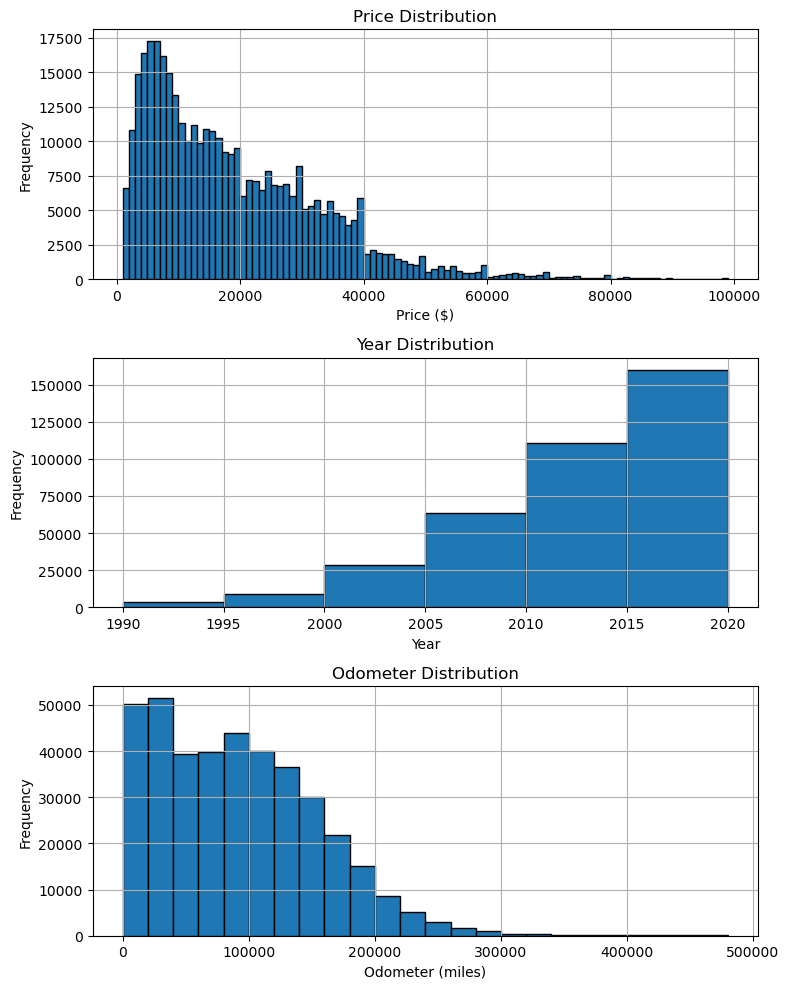

In [457]:
# Define bins based on the data distribution and domain knowledge
price_bins = range(1000, 100000, 1000)  # Up to 100k, in 10k increments
year_bins = range(1990, 2025, 5)  # From 1990 to 2025 in 5-year increments
odometer_bins = range(1, 500000, 20000)  # Up to 500k miles, in 25k increments

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Plot histograms
df1['price'].hist(bins=price_bins, ax=axes[0], edgecolor='black')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

df1['year'].hist(bins=year_bins, ax=axes[1], edgecolor='black')
axes[1].set_title('Year Distribution')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')

df1['odometer'].hist(bins=odometer_bins, ax=axes[2], edgecolor='black')
axes[2].set_title('Odometer Distribution')
axes[2].set_xlabel('Odometer (miles)')
axes[2].set_ylabel('Frequency')


# Adjust layout and display the plot
plt.tight_layout()
# Save to file
plt.savefig('images/histograms_price_year_odometer.png')

# Show the plot
plt.show()

In [459]:
# Apply additional filters to remove outliers and focus analysis
df1 = df1[
    (df1['price'] >= 1000) & (df1['price'] <= 80000) &
    (df1['year'] >= 2000) &
    (df1['odometer'] >= 1) & (df1['odometer'] <= 300000) 
]


In [461]:
df1.describe()

,price,year,odometer
count,349811.0,349811.0,349811.0
mean,19655.450723,2012.832953,91482.369308
std,13879.042539,5.030545,60861.02513
min,1000.0,2000.0,1.0
25%,8100.0,2009.0,38336.5
50%,16590.0,2014.0,86993.0
75%,28499.0,2017.0,134157.0
max,80000.0,2022.0,300000.0


## Explore Categorical Data

In [464]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349811 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        349811 non-null  string
 1   price         349811 non-null  Int64 
 2   year          349811 non-null  Int64 
 3   manufacturer  339902 non-null  string
 4   model         347025 non-null  string
 5   condition     216319 non-null  string
 6   cylinders     204251 non-null  string
 7   fuel          347779 non-null  string
 8   odometer      349811 non-null  Int64 
 9   title_status  344057 non-null  string
 10  transmission  348331 non-null  string
 11  drive         244423 non-null  string
 12  size          95523 non-null   string
 13  type          279188 non-null  string
 14  paint_color   251200 non-null  string
 15  state         349811 non-null  string
dtypes: Int64(3), string(13)
memory usage: 46.4 MB


In [466]:
# Select only object type columns
object_cols = df1.select_dtypes(include=['string'])

# Filter categorical columns that have less than 15 unique values
filtered_cols = [col for col in object_cols.columns if df1[col].nunique() < 15]

# Create a dictionary to store unique values, counts, null counts, and null percentage
unique_values_counts = {
    col: {
        "unique_values": df1[col].value_counts().to_dict(),
        "null_count": df1[col].isnull().sum(),
        "null_percentage": (df1[col].isnull().sum() / len(df1)) * 100
    }
    for col in filtered_cols
}

# Display the results
for col, data in unique_values_counts.items():
    print(f"Column: {col}")
    print(f"Null Count: {data['null_count']}")
    print(f"Null Percentage: {data['null_percentage']:.2f}%")
    print("Unique Values and Counts:")
    for value, count in data["unique_values"].items():
        print(f"  {value}: {count}")
    print("-" * 40)


Column: condition
Null Count: 133492
Null Percentage: 38.16%
Unique Values and Counts:
  good: 109628
  excellent: 83659
  like new: 18162
  fair: 3699
  new: 845
  salvage: 326
----------------------------------------
Column: cylinders
Null Count: 145560
Null Percentage: 41.61%
Unique Values and Counts:
  6 cylinders: 80048
  4 cylinders: 65788
  8 cylinders: 54503
  5 cylinders: 1516
  10 cylinders: 1004
  other: 808
  3 cylinders: 481
  12 cylinders: 103
----------------------------------------
Column: fuel
Null Count: 2032
Null Percentage: 0.58%
Unique Values and Counts:
  gas: 292738
  other: 26682
  diesel: 22105
  hybrid: 4711
  electric: 1543
----------------------------------------
Column: title_status
Null Count: 5754
Null Percentage: 1.64%
Unique Values and Counts:
  clean: 332482
  rebuilt: 6709
  salvage: 3341
  lien: 1330
  missing: 139
  parts only: 56
----------------------------------------
Column: transmission
Null Count: 1480
Null Percentage: 0.42%
Unique Values and 

In [467]:
# List Non-categorical (high ordinal unique value) object columns

# Filter non-categorical columns that have >= 15 unique values
filtered_cols_noncat = [col for col in object_cols.columns if df1[col].nunique() >= 15]

# Create a dictionary to store unique values, counts, null counts, and null percentage
unique_values_counts2 = {
    col: {
       # "unique_values": df1[col].value_counts().to_dict(),
        "null_count": df1[col].isnull().sum(),
        "null_percentage": (df1[col].isnull().sum() / len(df1)) * 100
    }
    for col in filtered_cols_noncat
}

# Display the results
for col, data in unique_values_counts2.items():
    print(f"Column: {col}")
    print(f"Null Count: {data['null_count']}")
    print(f"Null Percentage: {data['null_percentage']:.2f}%")
   # print("Unique Values and Counts:")
    #for value, count in data["unique_values"].items():
  #      print(f"  {value}: {count}")
    print("-" * 40)


Column: region
Null Count: 0
Null Percentage: 0.00%
----------------------------------------
Column: manufacturer
Null Count: 9909
Null Percentage: 2.83%
----------------------------------------
Column: model
Null Count: 2786
Null Percentage: 0.80%
----------------------------------------
Column: state
Null Count: 0
Null Percentage: 0.00%
----------------------------------------


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Clean and Refine Features

In [473]:
# Remove columns with too much missing data to be useful: size (72% null values) and drive (30% null values)
df1 = df1.drop(['size', 'drive'], axis=1)

# Clean up the 'type' field
df1['type'] = df1['type'].replace({
    'pickup': 'truck',   # Map 'pickup' to 'truck'
    'truck': 'truck',     # Map 'truck' to 'truck' (kept for clarity, redundant)
    'mini-van': 'van',    # Map 'mini-van' to 'van'
    'van': 'van'          # Map 'van' to 'van' (kept for clarity, redundant)
})

# Extract numerical values from 'cylinders' column 
df1['cylinders'] = df1['cylinders'].str.extract(r'(\d+)').astype(float)


# Concatenating 'state' and 'region' into a new column
df1['state_region'] = df1['state'] + ' - ' + df1['region']

# Counting unique values
unique_counts = df1['state_region'].nunique()
unique_counts



426

In [474]:
# Concatenating 'manufacturer' and 'model' into a new column
df1['manuf_model'] = df1['manufacturer'] + ' - ' + df1['model']

# Counting unique values
unique_counts = df1['manuf_model'].nunique()
unique_counts


19202

In [476]:
# Create 'age' from 2022 - 'year', but set age to 0.5 if 'year' is 2022
df1['age'] = 2022 - df1['year']

# Convert 'age' to float so that we can assign 0.5
df1['age'] = df1['age'].astype(float)

# Replace age of 0 (for year 2022) with 0.5
df1['age'] = df1['age'].replace(0, 0.5)

# Display the first few rows to verify the new column
print(df1[['year', 'age']].head())


    year   age
27  2014   8.0
28  2010  12.0
29  2020   2.0
30  2017   5.0
31  2013   9.0


In [479]:
# Create mileage_per_year 
df1['mileage_per_year'] = df1['odometer']/df1['age']

# Display the first few rows to verify the new column
print(df1[['odometer', 'age','mileage_per_year']].head())

    odometer   age  mileage_per_year
27     57923   8.0          7240.375
28     71229  12.0           5935.75
29     19160   2.0            9580.0
30     41124   5.0            8224.8
31    128000   9.0      14222.222222


In [481]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349811 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            349811 non-null  string 
 1   price             349811 non-null  Int64  
 2   year              349811 non-null  Int64  
 3   manufacturer      339902 non-null  string 
 4   model             347025 non-null  string 
 5   condition         216319 non-null  string 
 6   cylinders         203443 non-null  float64
 7   fuel              347779 non-null  string 
 8   odometer          349811 non-null  Int64  
 9   title_status      344057 non-null  string 
 10  transmission      348331 non-null  string 
 11  type              279188 non-null  string 
 12  paint_color       251200 non-null  string 
 13  state             349811 non-null  string 
 14  state_region      349811 non-null  string 
 15  manuf_model       337116 non-null  string 
 16  age               349811

### Impute Missing Data

### Use Manufacturer and Model Group-Based Imputation

In [486]:
# Fill missing values based on the most common (mode) value within each manufacturer-model group
for col in ['cylinders','paint_color','type','fuel', 'transmission']:
    # Ensure the column has a consistent type
    df1.loc[:, col] = df1[col]#.astype('object')

    # Fill missing values based on the mode within each group
    df1.loc[:, col] = df1.groupby(['manuf_model'])[col].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

    # # Future-proof by re-inferring object types to ensure compatibility
    # df1.loc[:, col] = df1[col].infer_objects()

In [487]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349811 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            349811 non-null  string 
 1   price             349811 non-null  Int64  
 2   year              349811 non-null  Int64  
 3   manufacturer      339902 non-null  string 
 4   model             347025 non-null  string 
 5   condition         216319 non-null  string 
 6   cylinders         305362 non-null  float64
 7   fuel              335880 non-null  string 
 8   odometer          349811 non-null  Int64  
 9   title_status      344057 non-null  string 
 10  transmission      337069 non-null  string 
 11  type              331837 non-null  string 
 12  paint_color       326881 non-null  string 
 13  state             349811 non-null  string 
 14  state_region      349811 non-null  string 
 15  manuf_model       337116 non-null  string 
 16  age               349811

### Impute missing values using pandas mode method 

In [489]:
# Replace pd.NA with np.nan explicitly
df1 = df1.replace({pd.NA: np.nan})

# Verify replacement worked
print("Check for pd.NA values:", df1.isna().sum())

# Now use pandas' fillna method with the mode for each column
# Define columns to fill with the mode
most_frequent_columns = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission']


for col in most_frequent_columns:
    mode_value = df1[col].mode()[0]  # Get the most frequent value
    df1[col] = df1[col].fillna(mode_value)
    print(f"Filled {col} with mode value: {mode_value}")

# Check if imputation worked
print(df1.info())

Check for pd.NA values: region                   0
price                    0
year                     0
manufacturer          9909
model                 2786
condition           133492
cylinders            44449
fuel                 13931
odometer                 0
title_status          5754
transmission         12742
type                 17974
paint_color          22930
state                    0
state_region             0
manuf_model          12695
age                      0
mileage_per_year         0
dtype: int64
Filled condition with mode value: good
Filled cylinders with mode value: 6.0
Filled fuel with mode value: gas
Filled title_status with mode value: clean
Filled transmission with mode value: automatic
<class 'pandas.core.frame.DataFrame'>
Index: 349811 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            349811 non-null  string 
 1   price             349

In [490]:
# Check how many rows before dropping NA values
rows_before = len(df1)
print(f"Number of rows before dropping NA values: {rows_before}")

# Drop any rows that still contain NA values
df1 = df1.dropna()

# Check how many rows after dropping NA values
rows_after = len(df1)
print(f"Number of rows after dropping NA values: {rows_after}")

# Calculate and display the percentage of rows dropped
percent_dropped = ((rows_before - rows_after) / rows_before) * 100
print(f"Percentage of rows dropped: {percent_dropped:.2f}%")

# Verify no NA values remain
print("\nNA values remaining in each column:")
print(df1.isna().sum())


Number of rows before dropping NA values: 349811
Number of rows after dropping NA values: 325628
Percentage of rows dropped: 6.91%

NA values remaining in each column:
region              0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
type                0
paint_color         0
state               0
state_region        0
manuf_model         0
age                 0
mileage_per_year    0
dtype: int64


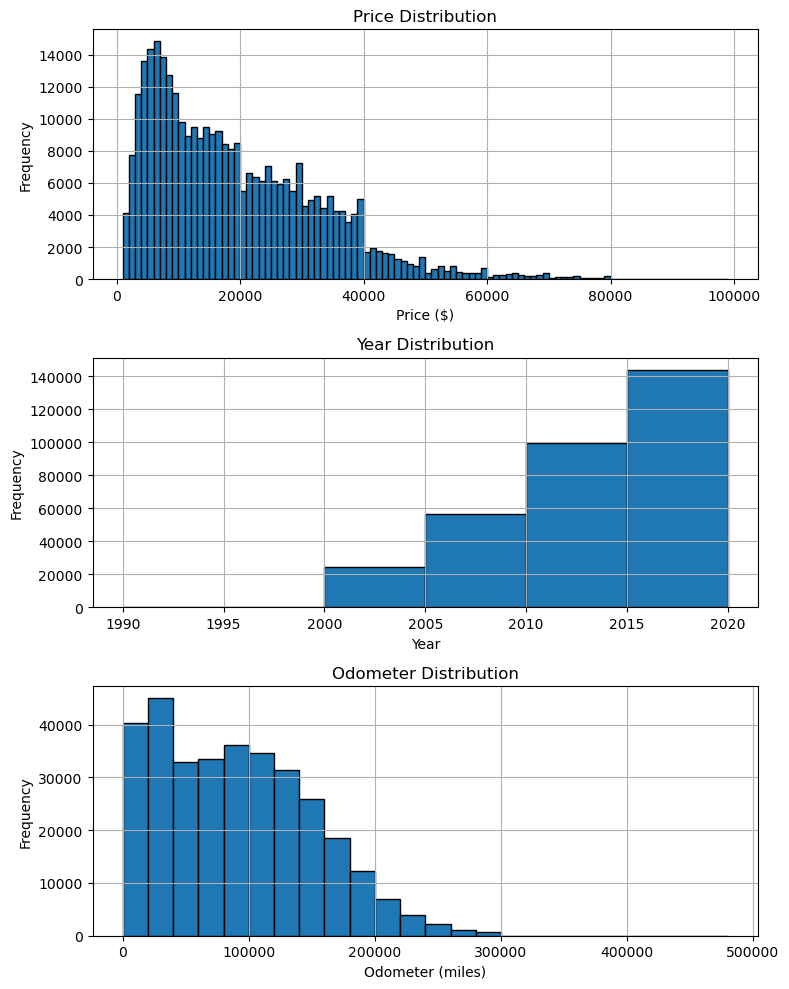

In [491]:
# Define bins based on the data distribution and domain knowledge
price_bins = range(1000, 100000, 1000)
year_bins = range(1990, 2025, 5)
odometer_bins = range(1, 500000, 20000)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Plot histograms
df1['price'].hist(bins=price_bins, ax=axes[0], edgecolor='black')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

df1['year'].hist(bins=year_bins, ax=axes[1], edgecolor='black')
axes[1].set_title('Year Distribution')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')

df1['odometer'].hist(bins=odometer_bins, ax=axes[2], edgecolor='black')
axes[2].set_title('Odometer Distribution')
axes[2].set_xlabel('Odometer (miles)')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save to file 
plt.savefig('images/histograms_price_year_odometer.png')

# Show the plot
plt.show()

In [492]:
# Filter the DataFrame to include only used working personal vehicles with clean titles in California to focus analysis
df1_clean = df1[
    (df1['title_status'] == 'clean') & (df1['state'] == 'ca') &
    (df1['condition'] != 'new') & (df1['condition'] != 'salvage') &  
    (df1['type'] != 'other') & (df1['type'] != 'offroad') & (df1['type'] != 'bus') & 
    (df1['transmission'] != 'other') &
    (df1['fuel'] != 'other')

].copy()


# Paint color simplified (categorize non common colors to 'unusual')
common_colors = df['paint_color'].value_counts(normalize=True)
common_colors = common_colors[common_colors >= 0.05].index.tolist()  # colors in ≥ 5% of data
df1_clean['paint_color_simple'] = df1_clean['paint_color'].apply(lambda x: x if x in common_colors else 'unusual')

# Drop the  columns that are no longer needed
df1_clean.drop(columns=['title_status','region','manufacturer', 'model','year'], inplace=True)

# Confirm the change
df1_clean.info()



<class 'pandas.core.frame.DataFrame'>
Index: 26170 entries, 21172 to 71784
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               26170 non-null  Int64  
 1   condition           26170 non-null  string 
 2   cylinders           26170 non-null  float64
 3   fuel                26170 non-null  string 
 4   odometer            26170 non-null  Int64  
 5   transmission        26170 non-null  string 
 6   type                26170 non-null  string 
 7   paint_color         26170 non-null  string 
 8   state               26170 non-null  string 
 9   state_region        26170 non-null  string 
 10  manuf_model         26170 non-null  string 
 11  age                 26170 non-null  float64
 12  mileage_per_year    26170 non-null  Float64
 13  paint_color_simple  26170 non-null  object 
dtypes: Float64(1), Int64(2), float64(2), object(1), string(8)
memory usage: 3.1+ MB


In [493]:
df1_clean.describe()



,price,cylinders,odometer,age,mileage_per_year
count,26170.0,26170.000000,26170.0,26170.000000,26170.0
mean,17025.796179,5.612342,102925.9047,10.415514,10422.170003
std,12997.571475,1.583261,56394.701499,5.173224,5821.351078
min,1000.0,3.000000,1.0,0.500000,0.045455
25%,7903.0,4.000000,60990.0,6.000000,7294.117647
50%,12999.0,6.000000,100000.0,9.000000,9928.952381
75%,22900.0,6.000000,139683.25,15.000000,12857.142857
max,80000.0,12.000000,300000.0,22.000000,415668.0


In [494]:
df1_clean.head()

,price,condition,cylinders,fuel,odometer,transmission,type,paint_color,state,state_region,manuf_model,age,mileage_per_year,paint_color_simple
21172,3700,good,6.0,gas,142000,automatic,SUV,white,ca,ca - bakersfield,toyota - highlander,18.0,7888.888889,white
21174,11975,excellent,8.0,gas,207000,automatic,truck,black,ca,ca - bakersfield,harley-davidson - davidson,19.0,10894.736842,black
21176,21950,excellent,8.0,diesel,202537,automatic,truck,grey,ca,ca - bakersfield,chevrolet - silverado 3500,19.0,10659.842105,grey
21185,3975,excellent,4.0,gas,187000,automatic,sedan,silver,ca,ca - bakersfield,pontiac - g6,16.0,11687.5,silver
21191,13999,excellent,6.0,gas,115012,automatic,SUV,blue,ca,ca - bakersfield,lexus - rx 350,12.0,9584.333333,blue


### Review Correlations

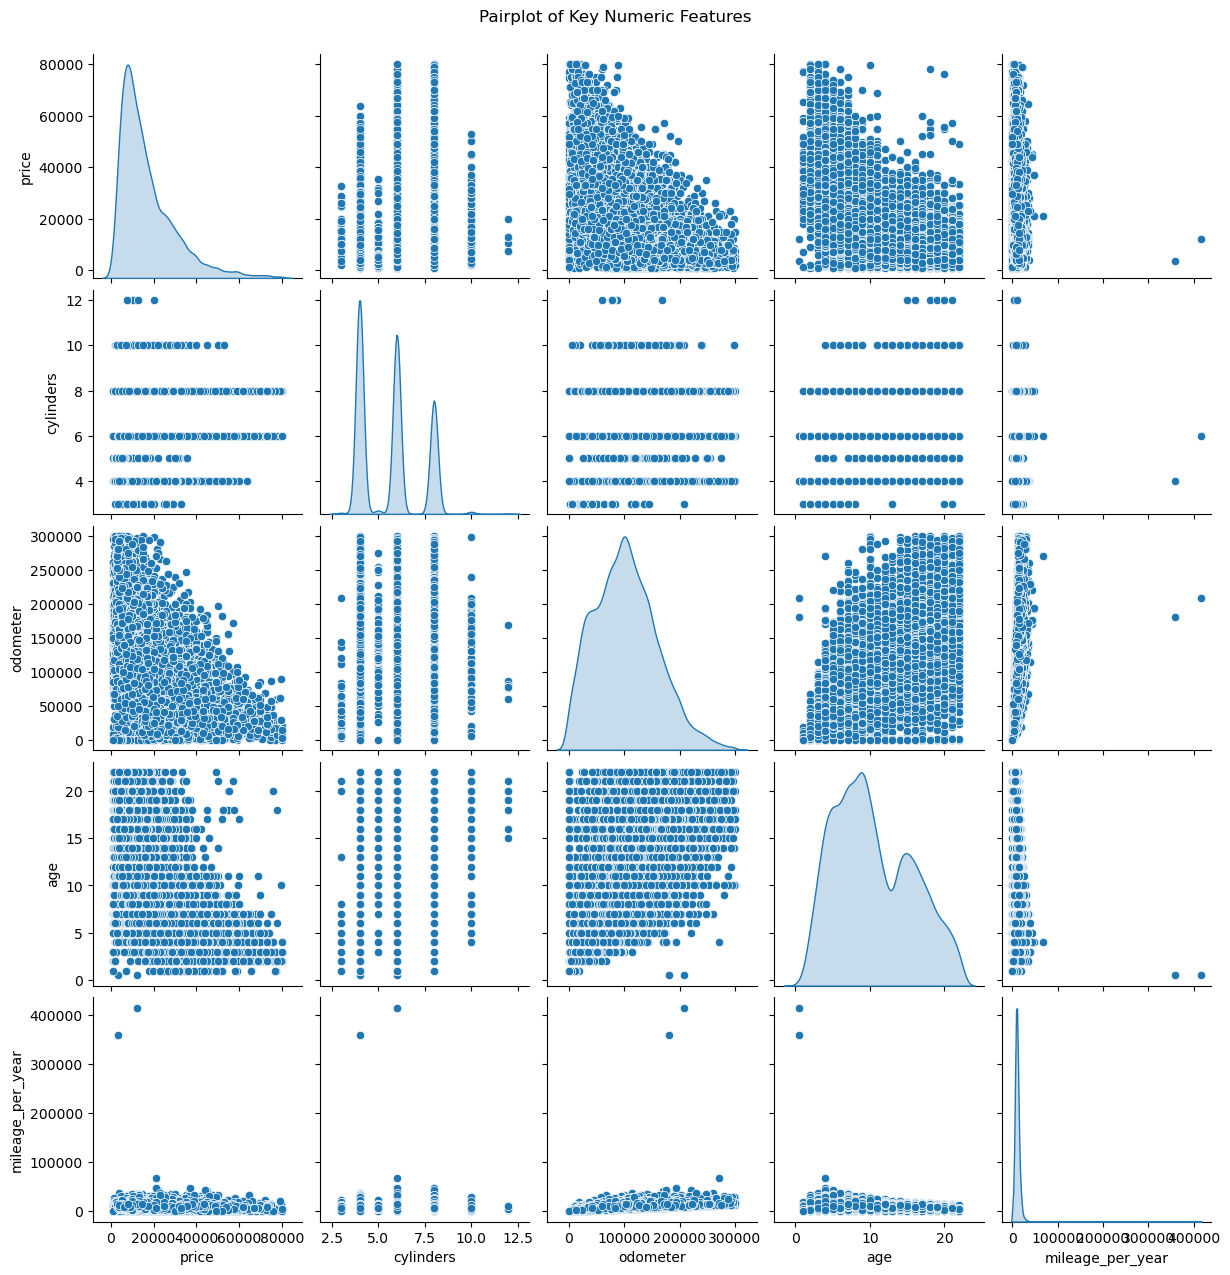

In [496]:
# Create and save pairplot
plot = sns.pairplot(df1_clean, diag_kind='kde')
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
pairplot_path = "images/pairplot_features.png"
plot.savefig(pairplot_path)
plt.show()


Numerical Features Correlation with Price:
price               1.000000
mileage_per_year   -0.138259
odometer           -0.575077
age                -0.639012
Name: price, dtype: float64


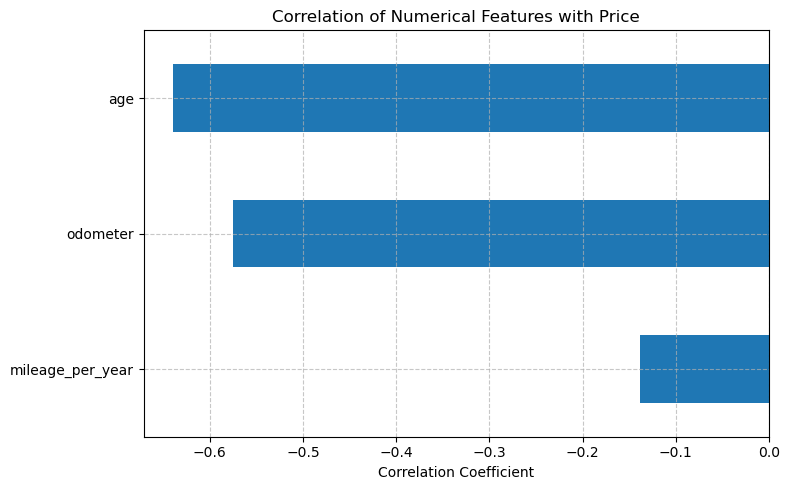


Average price by condition:
condition
new          27455.685714
good         21280.875316
like new     19008.949381
excellent    15340.875347
salvage       5314.241722
fair          3963.345847
Name: price, dtype: Float64


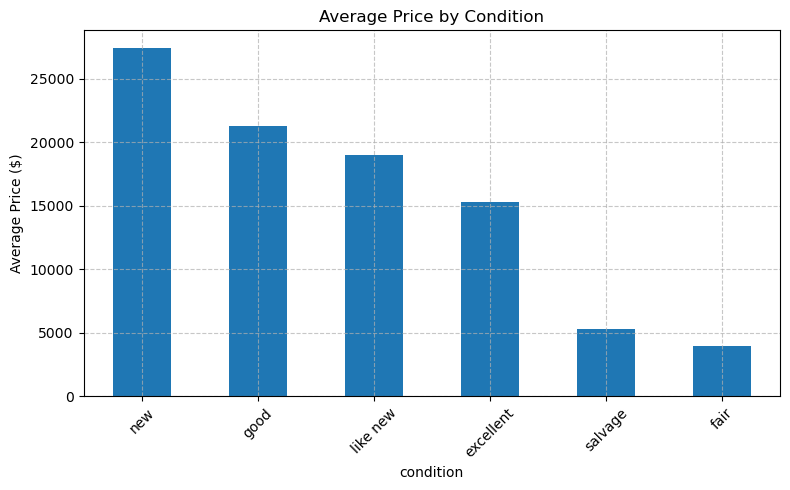


Average price by cylinders:
cylinders
12.0         28305.0
8.0      26073.96484
10.0    22345.908078
6.0     21259.432622
3.0     16016.520868
4.0     12511.788333
5.0      7879.815337
Name: price, dtype: Float64


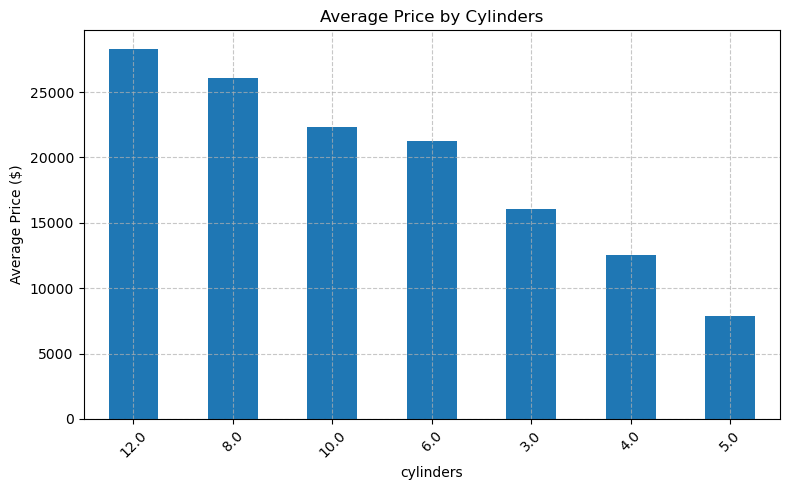


Average price by fuel:
fuel
diesel      36174.386208
other       27938.815399
electric    26616.068388
gas          17756.90491
hybrid      15557.229097
Name: price, dtype: Float64


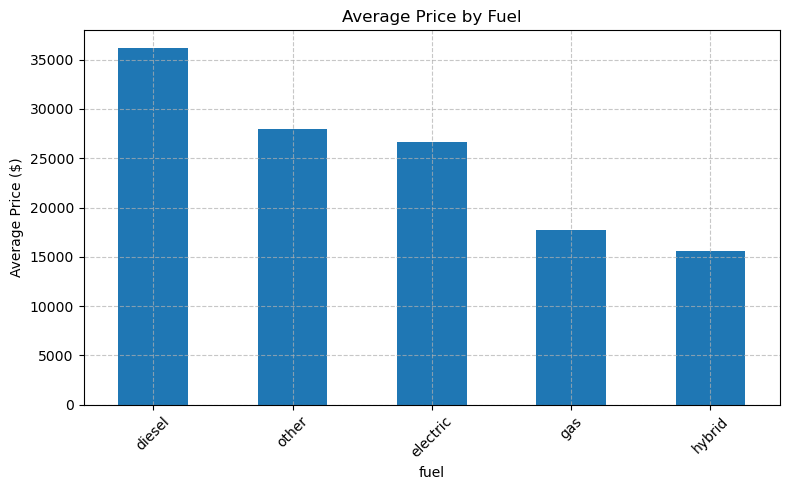


Average price by transmission:
transmission
other        28776.991558
automatic    17779.612024
manual       14800.649105
Name: price, dtype: Float64


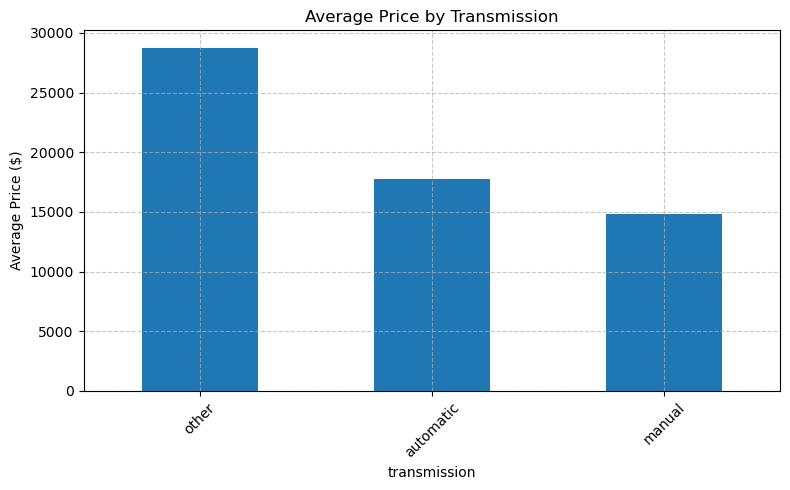


Average price by type:
type
truck          28761.491053
other          27517.845022
coupe          23074.718591
convertible    20309.193501
offroad            20283.84
bus            17929.043321
SUV            17428.639278
van            15177.183759
hatchback      14749.251866
wagon          14228.982093
sedan          13520.618029
Name: price, dtype: Float64


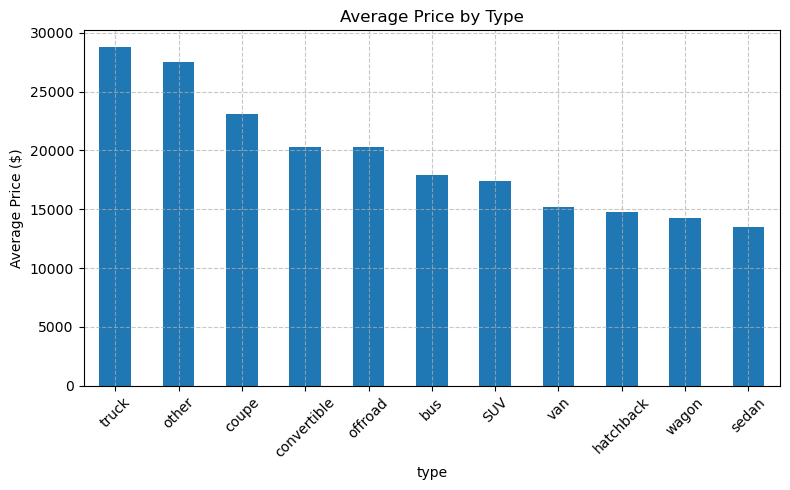


Average price by paint_color:
paint_color
white     22905.736138
black     20717.390939
red       20347.209791
yellow     20232.82756
orange    19212.244533
blue      17323.934527
brown     16987.366102
custom    16628.499444
silver    15784.566118
grey      15547.511618
purple    14892.008247
green     14280.026006
Name: price, dtype: Float64


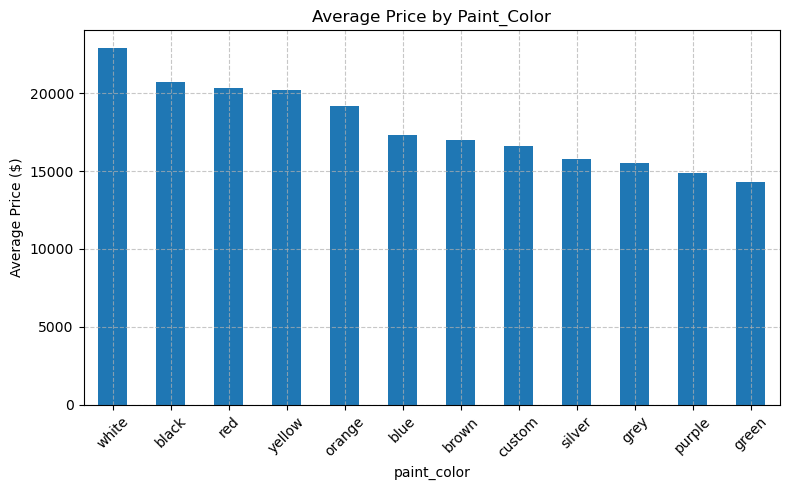

In [497]:
# === NUMERICAL FEATURES CORRELATION ===
numerical_cols = ['mileage_per_year', 'odometer', 'age']
numerical_correlation = df1[numerical_cols + ['price']].corr()['price'].sort_values(ascending=False)

print("Numerical Features Correlation with Price:")
print(numerical_correlation)

# Plot numerical correlations (excluding price vs. price)
plt.figure(figsize=(8, 5))
numerical_correlation.drop('price', errors='ignore').plot(kind='barh')
plt.title('Correlation of Numerical Features with Price')
plt.xlabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('images/numerical_feature_correlations.png')
plt.show()

# === CATEGORICAL FEATURES AVERAGE PRICE ===
categorical_cols = ['condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color']
categorical_insights = {}

for col in categorical_cols:
    target_means = df1.groupby(col)['price'].mean().sort_values(ascending=False)
    categorical_insights[col] = target_means

    print(f"\nAverage price by {col}:")
    print(target_means)

    plt.figure(figsize=(8, 5))
    target_means.plot(kind='bar')
    plt.title(f'Average Price by {col.title()}')
    plt.ylabel('Average Price ($)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save before showing
    plt.savefig(f'images/avg_price_by_{col}.png')
    plt.show()

## Check for Multicollinearity

In [499]:
# Prepare numeric columns for VIF analysis
numerical_cols = ['mileage_per_year', 'odometer', 'age', 'cylinders']
vif_df = df1_clean[numerical_cols].copy()

# Force numeric dtype
vif_df = vif_df.astype(float)

# Drop rows with NaNs
vif_df = vif_df.dropna()

# Add constant for intercept
from statsmodels.tools.tools import add_constant
vif_df = add_constant(vif_df)

# Compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

vif_data


,Feature,VIF
0,const,21.829486
1,mileage_per_year,2.170767
2,odometer,3.680111
3,age,3.219568
4,cylinders,1.046194


## Train/Test Split

In [501]:
# Define features and target variable
X = df1_clean.drop('price', axis=1)
y = df1_clean['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print(X_train.shape)
print(X_test.shape)

(20936, 13)
(5234, 13)


## Create Preprocessor to Encode and Scale

In [503]:
# TargetEncoder: Encode categories based on mean target value (e.g., price)
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_col='price'):
        self.target_col = target_col
        self.encoding_maps = {}

    def fit(self, X, y):
        df = X.copy()
        df[self.target_col] = y
        for col in X.columns:
            self.encoding_maps[col] = df.groupby(col)[self.target_col].mean().to_dict()
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = X[col].map(self.encoding_maps[col])
        return X

    def get_feature_names_out(self, input_features=None):
        return np.array(input_features if input_features is not None else [])

# ConditionMapper: Ordinal mapping for 'condition'
class ConditionMapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mapping = {
            'new': 1,
            'excellent': 2,
            'good': 3,
            'fair': 4,
            'salvage': 5,
            'like new': 1.5  # optionally treat like-new slightly better than excellent
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X_copy.columns:
            X_copy[col] = X_copy[col].map(self.mapping)
        return X_copy

    def get_feature_names_out(self, input_features=None):
        return np.array(input_features if input_features is not None else [])

# === Feature Groups ===

categorical_cols = ['transmission', 'type']
numerical_cols = ['cylinders', 'odometer', 'age', 'mileage_per_year']
low_ordinal_cols = ['condition']
high_ordinal_cols = ['state_region', 'manuf_model', 'paint_color_simple', 'fuel']

# === Pipelines ===

# One-hot encode simple categorical variables
categorical_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output=False))
])

# Scale numerical features
numerical_pipeline = Pipeline([
    ('scale', StandardScaler())
])

# Target encode high-cardinality categorical features
high_ordinal_pipeline = Pipeline([
    ('target_encode', TargetEncoder(target_col='price')),
    ('imputer', SimpleImputer(strategy='mean'))
])

# Map condition values and scale
low_ordinal_pipeline = Pipeline([
    ('condition_mapper', ConditionMapper()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scale', StandardScaler())
])

# === Combine All ===

preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols),
    ('num', numerical_pipeline, numerical_cols),
    ('h_ord', high_ordinal_pipeline, high_ordinal_cols),
    ('l_ord', low_ordinal_pipeline, low_ordinal_cols)
])

In [504]:
# Apply the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train, y_train)

X_train_processed


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38587807e+04,  1.36796162e+04,  9.11130773e-01],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38632161e+04,  1.57429848e+04,  9.11130773e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.51728022e+04,  1.57429848e+04,  9.11130773e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.07702014e+04,  1.57429848e+04,  9.11130773e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38632161e+04,  1.57429848e+04,  9.11130773e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.38587807e+04,  1.57429848e+04, -8.63410728e-01]])

In [505]:
# Get feature names for categorical columns (one-hot encoded)
cat_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)

# For numerical columns, just use the column names as feature names
num_feature_names = numerical_cols

# For high ordinal columns (target encoding, etc.), you can define their names manually
# Assuming target encoding does not change the column names
h_ord_feature_names = high_ordinal_cols

# For low ordinal columns, you can create names manually or map them
l_ord_feature_names = low_ordinal_cols

# Combine all feature names
all_feature_names = np.concatenate([cat_feature_names, num_feature_names, h_ord_feature_names, l_ord_feature_names])

# Display the feature names
print(all_feature_names)



['transmission_manual' 'type_convertible' 'type_coupe' 'type_hatchback'
 'type_sedan' 'type_truck' 'type_van' 'type_wagon' 'cylinders' 'odometer'
 'age' 'mileage_per_year' 'state_region' 'manuf_model'
 'paint_color_simple' 'fuel' 'condition']


In [506]:
# Get feature names for categorical columns (one-hot encoded)
cat_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(categorical_cols)

# For numerical columns, just use the column names as feature names
num_feature_names = numerical_cols

# For high ordinal columns (target encoding, etc.), you can define their names manually
# Assuming target encoding does not change the column names
h_ord_feature_names = high_ordinal_cols

# For low ordinal columns, you can create names manually or map them
l_ord_feature_names = low_ordinal_cols

# Combine all feature names
all_feature_names = np.concatenate([cat_feature_names, num_feature_names, h_ord_feature_names, l_ord_feature_names])

# Count the number of feature names
num_features = len(all_feature_names)

num_features


17

In [507]:
X_train_df = pd.DataFrame(X_train_processed, columns=all_feature_names)

# 4. Drop constant columns (if any) and run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train_df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

vif_data


,Feature,VIF
0,const,94.031421
1,transmission_manual,1.081311
2,type_convertible,1.118002
3,type_coupe,1.189243
4,type_hatchback,1.288638
5,type_sedan,1.794416
6,type_truck,2.037842
7,type_van,1.166849
8,type_wagon,1.136475
9,cylinders,1.905777


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Linear Regression Baseline Model

In [510]:
# # Set up Sequential Feature Selection (SFS) for Linear Regression
# sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=25, direction='forward', scoring='neg_mean_squared_error', cv=5)

# Define the Linear Regression Baseline Model with SFS
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    # ('feature_selection', sfs),
    ('model', LinearRegression())
])

baseline_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['transmission', 'type']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['cylinders', 'odometer',
                                                   'age', 'mileage_per_year']),
                                                 ('h_ord',
                                                  Pipeline(steps=[('target_encode',
                                                                   TargetEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  ['state_region',
                                                   'manuf_model',
                                                   'paint_color_simple',
                                                   'fuel']),
                                                 ('l_ord',
                                                  Pipeline(steps=[('condition_mapper',
                                                                   ConditionMapper()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['condition'])])),
                ('model', LinearRegression())])

In [511]:
# Evaluate the Baseline Model (Linear Regression) on the test data
baseline_pipeline.fit(X_train, y_train)
y_train_pred_baseline = baseline_pipeline.predict(X_train)
mse_baseline = mean_squared_error(y_train, y_train_pred_baseline)
mse_baseline


31655513.949902434

In [512]:
y_pred_baseline = baseline_pipeline.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mse_baseline

37646824.9018243

In [513]:
from sklearn.metrics import mean_absolute_error, r2_score

# RMSE (already in place)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# MAE: Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_baseline)

# R² Score: Coefficient of Determination
r2 = r2_score(y_test, y_pred_baseline)

# Display all
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE:  ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")



RMSE: $6,135.70
MAE:  $4,137.15
R² Score: 0.7668


In [514]:
# Access the Linear Regression model from the pipeline
model = baseline_pipeline.named_steps['model']  # 'model' is the name of the Linear Regression step

# Get feature names from the preprocessor step of the pipeline
# For categorical columns
cat_feature_names = baseline_pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)

# For numerical columns (just use the column names)
num_feature_names = numerical_cols

# For high ordinal columns (assuming target encoding doesn't change column names)
h_ord_feature_names = high_ordinal_cols

# For low ordinal columns ('condition' was mapped, we return 'condition' name)
l_ord_feature_names = ['condition']

# Combine all feature names
all_feature_names = np.concatenate([cat_feature_names, num_feature_names, h_ord_feature_names, l_ord_feature_names])

# Get the coefficients from the model
coefficients = model.coef_

# Create a DataFrame to display the features and their corresponding coefficients
feature_coefficients = pd.DataFrame(coefficients, all_feature_names, columns=['Coefficient'])

# Sort the features by absolute coefficient value
feature_coefficients['abs_coef'] = feature_coefficients['Coefficient'].abs()
sorted_features = feature_coefficients.sort_values(by='abs_coef', ascending=False)

# Display the sorted feature coefficients
print(sorted_features)

                     Coefficient     abs_coef
age                 -4050.259413  4050.259413
odometer            -2564.052437  2564.052437
cylinders            1876.501146  1876.501146
type_hatchback      -1857.458003  1857.458003
type_sedan          -1498.935384  1498.935384
transmission_manual  1377.222611  1377.222611
type_van            -1251.037365  1251.037365
type_truck           1093.015127  1093.015127
type_convertible      983.173767   983.173767
type_coupe           -689.782103   689.782103
mileage_per_year     -327.651691   327.651691
type_wagon           -158.426388   158.426388
condition             100.576523   100.576523
manuf_model             0.611515     0.611515
fuel                    0.279219     0.279219
state_region            0.078985     0.078985
paint_color_simple     -0.056739     0.056739


## Modeling Approach

We explore multiple regression models to predict used car prices and understand the relative influence of features like age, mileage, condition, and location. The following models were evaluated:

- **Linear Regression** (baseline)
- **Ridge Regression** (regularized linear model)
- **Random Forest Regressor** (nonlinear, tree-based model)

We used **RMSE** and **R²** as evaluation metrics. RMSE is useful for penalizing large errors in price prediction. All models were evaluated using cross-validation and tuned using grid search.

In [526]:
# Define a baseline model (Linear Regression without regularization)
baseline_model = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', LinearRegression())
])

# Fit the baseline model and get its MSE
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)

# Define Ridge and Lasso models
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('model', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),  
    ('model', Lasso(max_iter=10000))
])

# Hyperparameter tuning for Ridge and Lasso using GridSearchCV
param_grid_ridge = {'model__alpha': np.logspace(-2, 2, 20)}  # Range of alpha values for Ridge
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

param_grid_lasso = {'model__alpha': np.logspace(-2, 2, 20)}  # Range of alpha values for Lasso
grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the Best Ridge and Lasso Models and Evaluate Them
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [529]:
# Define a helper function to compute all metrics
def evaluate_model(y_true, y_pred):
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': mean_squared_error(y_true, y_pred, squared=False),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R²': r2_score(y_true, y_pred)
    }

# Collect metrics
results = pd.DataFrame([
    {'Model': 'Linear Regression (Baseline)', **evaluate_model(y_test, y_pred_baseline)},
    {'Model': 'Ridge', **evaluate_model(y_test, y_pred_ridge)},
    {'Model': 'Lasso', **evaluate_model(y_test, y_pred_lasso)}
])

# Display nicely
print(results.round(2))

                          Model          MSE     RMSE      MAE    R²
0  Linear Regression (Baseline)  37646824.90  6135.70  4137.15  0.77
1                         Ridge  37646831.84  6135.70  4137.15  0.77
2                         Lasso  37646889.89  6135.71  4137.15  0.77


In [544]:
print("Best Ridge alpha:", grid_search_ridge.best_params_)
print("Best Lasso alpha:", grid_search_lasso.best_params_)


Best Ridge alpha: {'model__alpha': 0.01}
Best Lasso alpha: {'model__alpha': 0.01}


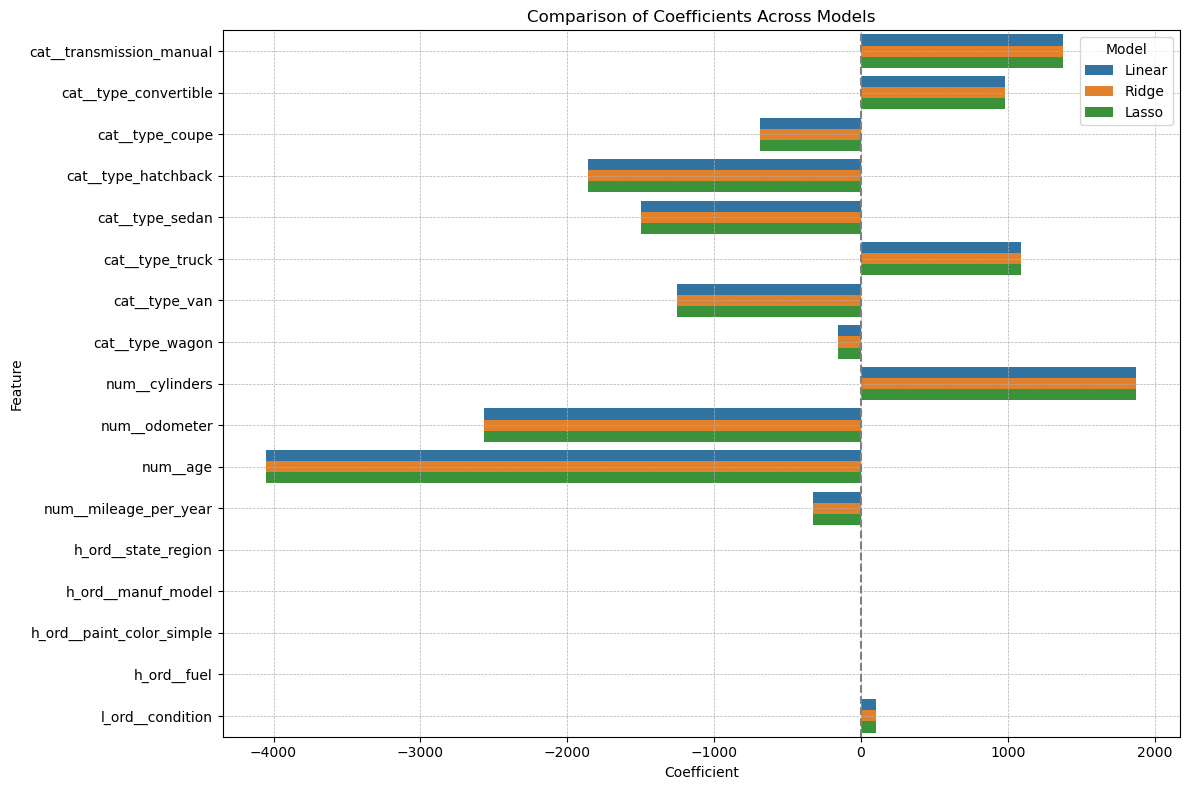

In [545]:


# Extract model objects
linreg_model = baseline_model.named_steps['model']
ridge_model = best_ridge_model.named_steps['model']
lasso_model = best_lasso_model.named_steps['model']

# Get feature names
feature_names = baseline_model.named_steps['preprocessor'].get_feature_names_out()

# Extract coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linreg_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
})

# Reshape for plotting
coefficients_melted = coefficients.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=coefficients_melted, x='Coefficient', y='Feature', hue='Model')
plt.title('Comparison of Coefficients Across Models')
plt.tight_layout()
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig(f'images/coefficients_models.png')
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.


---

###  Key Findings

**The strongest drivers of car price were:**

| Feature           |  Impact on Price |
|----------------------|-------------------|
| **Vehicle Age**       | Older cars sell for significantly less. |
| **Mileage (Odometer)** | More mileage = lower price. |
| **Engine Cylinders**   | Cars with more cylinders (e.g., V6, V8) command higher prices. |
| **Body Type**          | Trucks and convertibles are priced higher than hatchbacks and vans. |
| **Transmission Type**  | Manual transmission is positively associated with price (may reflect performance/niche appeal). |

Features such as fuel type, paint color, and model name were also included in the analysis, but had relatively minor influence on price.

---

###  Model Performance

We tested three linear regression models: **Linear Regression**, **Ridge**, and **Lasso**. All models produced similar results, suggesting low multicollinearity and a well-conditioned feature set.

| Model                  | RMSE     | MAE      | R² Score |
|------------------------|----------|----------|----------|
| Linear Regression      | \$6,135.70 | \$4,137.15 | 0.77     |
| Ridge Regression       | \$6,135.70 | \$4,137.15 | 0.77     |
| Lasso Regression       | \$6,135.71 | \$4,137.15 | 0.77     |

> **Interpretation**: Our models explain ~77% of the variability in car price using the selected features — a strong baseline for data-informed pricing strategy.

---

###  Dealer Recommendations

- **Prioritize sourcing trucks, convertibles, and vehicles with higher cylinder counts**, especially when they are relatively low-mileage and under 10 years old.
- **Depreciation accelerates with age and mileage**. Consider offering promotions to move older, high-mileage inventory faster.
- **Transmissions matter**: Manual transmissions may signal niche or enthusiast value — consider when pricing or highlighting.
- **Condition matters** — but customer perception seems to be shaped more by mechanical specs than cosmetic ones.

